In [1]:
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer,Conv2D,Dense , MaxPooling2D ,Input , Flatten
import tensorflow as tf

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
len(gpus)

1

In [4]:
POS_PATH = os.path.join('data','positive')
NEG_PATH = os.path.join('data','negative')
ANC_PATH = os.path.join('data','anchor')

In [5]:
POS_PATH

'data\\positive'

In [6]:
# os.makedirs(POS_PATH)
# os.makedirs(NEG_PATH)
# os.makedirs(ANC_PATH)

In [7]:
 !tar -xf lfw.tgz

In [8]:
import os

# Loop over directories in 'lfw'
for directory in os.listdir('lfw'):
    # Check if it's a directory before listing files
    directory_path = os.path.join('lfw', directory)
    if os.path.isdir(directory_path):
        for file in os.listdir(directory_path):
            EX_PATH = os.path.join('lfw', directory, file)
            NEW_PATH = os.path.join(NEG_PATH, file)
            # Add your logic to move or process files here
            os.replace(EX_PATH,NEW_PATH)


In [9]:
os.listdir('lfw')

['Aaron_Eckhart',
 'Aaron_Guiel',
 'Aaron_Patterson',
 'Aaron_Peirsol',
 'Aaron_Pena',
 'Aaron_Sorkin',
 'Aaron_Tippin',
 'Abbas_Kiarostami',
 'Abba_Eban',
 'Abdel_Aziz_Al-Hakim',
 'Abdel_Madi_Shabneh',
 'Abdel_Nasser_Assidi',
 'Abdoulaye_Wade',
 'Abdulaziz_Kamilov',
 'Abdullah',
 'Abdullah_Ahmad_Badawi',
 'Abdullah_al-Attiyah',
 'Abdullah_Gul',
 'Abdullah_Nasseef',
 'Abdullatif_Sener',
 'Abdul_Majeed_Shobokshi',
 'Abdul_Rahman',
 'Abel_Aguilar',
 'Abel_Pacheco',
 'Abid_Hamid_Mahmud_Al-Tikriti',
 'Abner_Martinez',
 'Abraham_Foxman',
 'Aby_Har-Even',
 'Adam_Ant',
 'Adam_Freier',
 'Adam_Herbert',
 'Adam_Kennedy',
 'Adam_Mair',
 'Adam_Rich',
 'Adam_Sandler',
 'Adam_Scott',
 'Adelina_Avila',
 'Adel_Al-Jubeir',
 'Adisai_Bodharamik',
 'Adolfo_Aguilar_Zinser',
 'Adolfo_Rodriguez_Saa',
 'Adoor_Gopalakarishnan',
 'Adriana_Lima',
 'Adriana_Perez_Navarro',
 'Adrianna_Zuzic',
 'Adrian_Annus',
 'Adrian_Fernandez',
 'Adrian_McPherson',
 'Adrian_Murrell',
 'Adrian_Nastase',
 'Adrien_Brody',
 'Afton_S

In [10]:
import uuid

In [11]:
uuid.uuid1()

UUID('ee84b05b-bafc-11ef-ba6c-cc474005ef57')

In [12]:
cap  = cv2.VideoCapture(1)
while cap.isOpened():
    ret,frame = cap.read()
    #250x250
    frame = frame[120:120+250,200:200+250,:]

    if cv2.waitKey(1) & 0XFF == ord('a'):
        imgname = os.path.join(ANC_PATH , '{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname,frame)
        

    if cv2.waitKey(1) & 0XFF == ord('p'):
        imgname = os.path.join(POS_PATH , '{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname,frame)
    
    cv2.imshow('Image Collection',frame)
    #breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break

#Release the webcam
cap.release()

#Close the image show frame
cv2.destroyAllWindows()


In [13]:
cv2.waitKey??

Docstring:
waitKey([, delay]) -> retval
.   @brief Waits for a pressed key.
.   
.   The function waitKey waits for a key event infinitely (when \f$\texttt{delay}\leq 0\f$ ) or for delay
.   milliseconds, when it is positive. Since the OS has a minimum time between switching threads, the
.   function will not wait exactly delay ms, it will wait at least delay ms, depending on what else is
.   running on your computer at that time. It returns the code of the pressed key or -1 if no key was
.   pressed before the specified time had elapsed. To check for a key press but not wait for it, use
.   #pollKey.
.   
.   @note The functions #waitKey and #pollKey are the only methods in HighGUI that can fetch and handle
.   GUI events, so one of them needs to be called periodically for normal event processing unless
.   HighGUI is used within an environment that takes care of event processing.
.   
.   @note The function only works if there is at least one HighGUI window created and the window is


In [14]:
# plt.imshow(frame)

In [15]:
# plt.imshow(frame[120:120+250,200:200+250,:])

In [16]:
ANC_PATH+'\*.jpg'

'data\\anchor\\*.jpg'

In [17]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(10)
positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(10)
negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(10)

In [18]:
dir_img = anchor.as_numpy_iterator()
dir_img.next()

b'data\\anchor\\img17.jpg'

In [19]:
def preprocess(file_path):
    byte_img = tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(byte_img)
    img = tf.image.resize(img,(100,100))
    img = img/255.0
    return img

In [20]:
img = preprocess('data\\anchor\\img1.jpg')

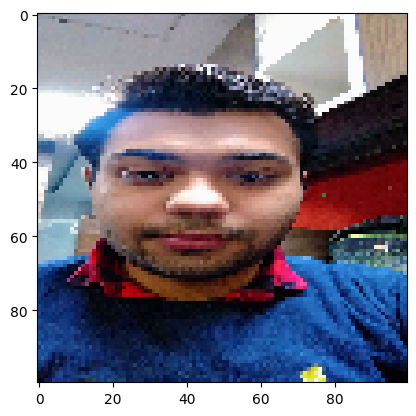

In [21]:
plt.imshow(img)

In [22]:
img.numpy().max()

1.0

In [23]:
# dataset.map(preprocess)

In [24]:
positives = tf.data.Dataset.zip((anchor,positive,tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor,negative,tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [25]:
samples = data.as_numpy_iterator()
example = samples.next()

In [26]:
example

(b'data\\anchor\\img39.jpg', b'data\\positive\\img32.jpg', 1.0)

In [27]:
def preprocess_twin(input_img,validation_img,label):
    return (preprocess(input_img),preprocess(validation_img),label)

In [28]:
res = preprocess_twin(*example)


In [29]:
res[2]

1.0

In [30]:
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [31]:
data

<ShuffleDataset element_spec=(TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [32]:
samples = data.as_numpy_iterator()

In [33]:
sam = samples.next()

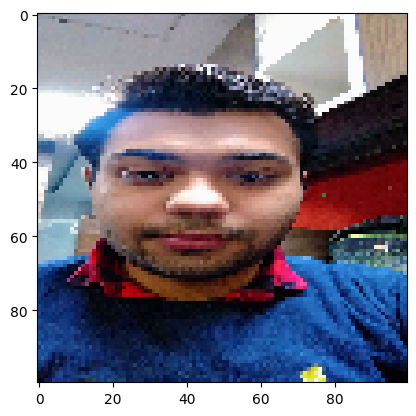

In [34]:
plt.imshow(sam[0])

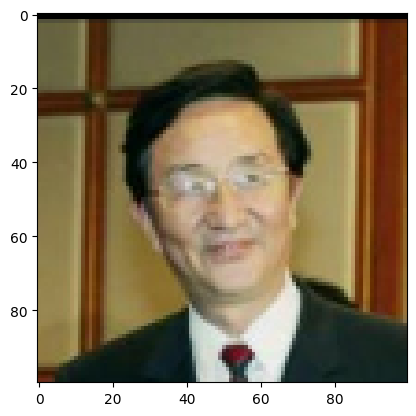

In [35]:
plt.imshow(sam[1])

In [36]:
sam[2]

0.0

In [37]:
train_data =  data.take(round(len(data)*7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [38]:
train_data

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [39]:
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

In [40]:
def make_embedding():
    inp = Input(shape=(100,100,3),name = 'input_image')

    c1 = Conv2D(64,(10,10),activation ='relu')(inp)
    m1 = MaxPooling2D(64,(2,2),padding = 'same')(c1)

    c2 = Conv2D(128,(7,7),activation ='relu')(m1)
    m2 = MaxPooling2D(64,(2,2),padding = 'same')(c2)

    c3 = Conv2D(128,(4,4),activation ='relu')(m2)
    m3 = MaxPooling2D(64,(2,2),padding = 'same')(c3)

    c4 = Conv2D(256,(4,4) , activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096,activation = 'sigmoid')(f1)


    
    return Model(inputs = [inp] , outputs= [d1] , name ='embedding')
     

In [41]:
embedding = make_embedding()

In [42]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 128)       26

In [43]:
class L1Dist(Layer):
    def __init__(self,**kwargs):
        super().__init__()
    def call(self,input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [44]:
def make_siamese_model():
    input_image = Input(name = 'input_img',shape = (100,100,3))
    validation_image  = Input(name='validation_img',shape=(100,100,3))
    siamese_layer=L1Dist()
    siamese_layer._name= 'distance'
    distances = siamese_layer(embedding(input_image),embedding(validation_image))
    classifier =  Dense(1,activation='sigmoid')(distances)
    return Model(inputs=[input_image,validation_image],outputs=classifier,name ='SiameseNetwork')
    

In [45]:
siamese_model = make_siamese_model()

In [46]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

In [47]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [48]:
 opt = tf.keras.optimizers.Adam(1e-4)

In [49]:
checkpoint_dir='./training_checkpoints'
checkpoint_prefix=os.path.join(checkpoint_dir,'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt,siamese_model=siamese_model)

In [50]:
@tf.function
def train_step(batch):
    with tf.GradientTape() as tape:

        X=batch[:2]
        Y= batch[2]
        yhat = siamese_model(X,training = True)
        loss = binary_cross_loss(Y,yhat)
    grad = tape.gradient(loss,siamese_model.trainable_variables)
    opt.apply_gradients(zip(grad,siamese_model.trainable_variables))
    return loss
    

In [51]:
def train(data,EPOCHS):
    for epoch in range(1,EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch,EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        for idx,batch in enumerate(train_data):
            train_step(batch)
            progbar.update(idx+1)
        if epoch % 10 == 0 :
            checkpoint.save(file_prefix = checkpoint_prefix)

In [52]:
EPOCHS = 50

In [53]:
train(train_data,EPOCHS)


 Epoch 1/50
2/2 [==============================] - 6s 618ms/step

 Epoch 2/50
2/2 [==============================] - 0s 350ms/step

 Epoch 3/50
2/2 [==============================] - 0s 351ms/step

 Epoch 4/50
2/2 [==============================] - 0s 361ms/step

 Epoch 5/50
2/2 [==============================] - 0s 361ms/step

 Epoch 6/50
2/2 [==============================] - 0s 361ms/step

 Epoch 7/50
2/2 [==============================] - 0s 364ms/step

 Epoch 8/50
2/2 [==============================] - 0s 361ms/step

 Epoch 9/50
2/2 [==============================] - 0s 361ms/step

 Epoch 10/50
2/2 [==============================] - 0s 350ms/step

 Epoch 11/50
2/2 [==============================] - 0s 351ms/step

 Epoch 12/50
2/2 [==============================] - 0s 347ms/step

 Epoch 13/50
2/2 [==============================] - 0s 352ms/step

 Epoch 14/50
2/2 [==============================] - 0s 355ms/step

 Epoch 15/50
2/2 [==============================] - 0s 349ms/step

 Ep

In [54]:
from tensorflow.keras.metrics import Recall , Precision

In [55]:
test_input , test_val , y_true = test_data.as_numpy_iterator().next()

In [56]:
y_true

array([1., 1., 0., 1., 1., 0.], dtype=float32)

In [57]:
predictions = siamese_model.predict([test_input,test_val])
predictions


1/1 [==============================] - 0s 320ms/step


array([[9.9995315e-01],
       [9.9984729e-01],
       [9.6992226e-05],
       [9.9942905e-01],
       [9.9945933e-01],
       [3.6505490e-04]], dtype=float32)

In [58]:
[ 1 if prediction > 0.5 else 0 for prediction in predictions]

[1, 1, 0, 1, 1, 0]

In [59]:
y_true

array([1., 1., 0., 1., 1., 0.], dtype=float32)

In [60]:
m = Recall()

m.update_state(y_true,predictions)
m.result().numpy()

1.0

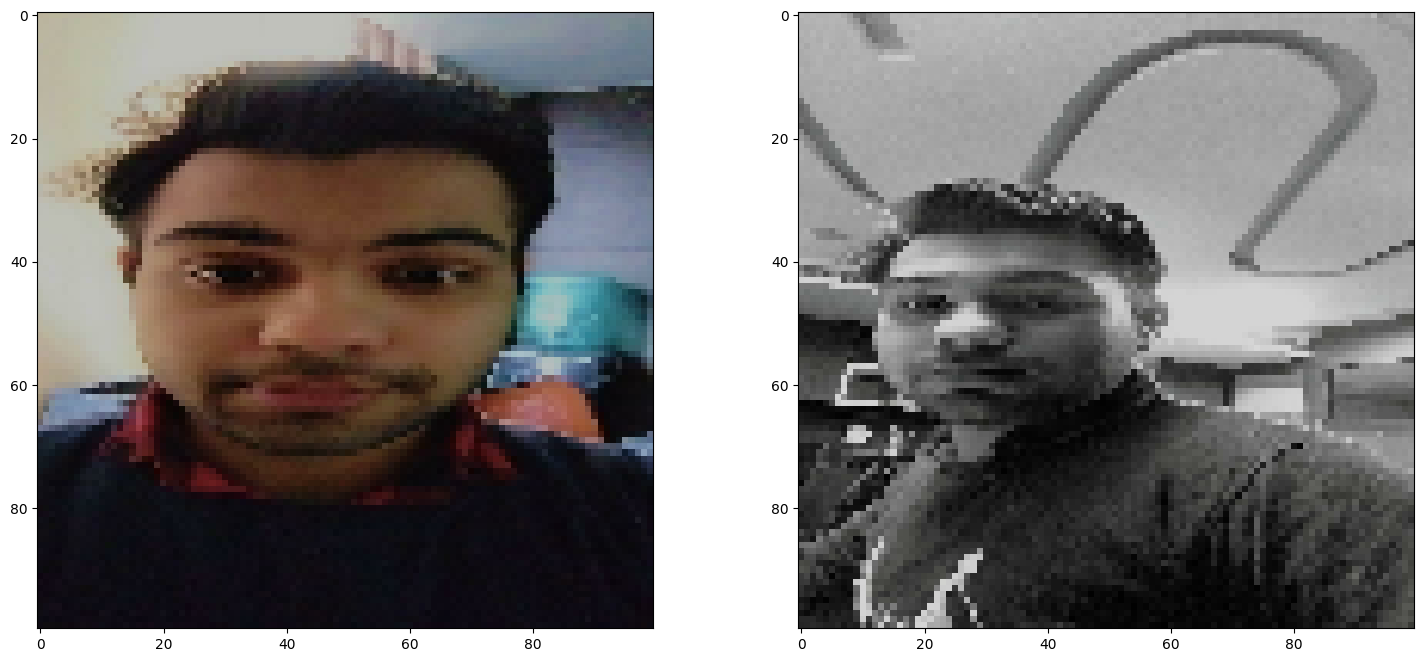

In [61]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.imshow(test_input[1])
plt.subplot(1,2,2)
plt.imshow(test_val[1])
plt.show()

In [ ]:
siamese_model.save('model.h5',save_format='h5')

TypeError: save() got an unexpected keyword argument 'custom_objects'

In [71]:
model = tf.keras.models.load_model('model.h5', custom_objects={'L1Dist':L1Dist})

In [72]:
model.predict([test_input,test_val])

1/1 [==============================] - 0s 65ms/step


array([[9.9995315e-01],
       [9.9984717e-01],
       [9.6915028e-05],
       [9.9942786e-01],
       [9.9946016e-01],
       [3.6433831e-04]], dtype=float32)

In [73]:
model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

In [74]:
def verify( model , detection_threshold, verification_threshold):
    results = []
    for image in os.listdir(os.path.join('application_data','verification_image')):
        input_img = preprocess(os.path.join('application_data','input_image','input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data','verification_image',image))
        
        result = model.predict(list(np.expand_dims([input_img,validation_img],axis = 1)))
        results.append(result)
    detection = np.sum(np.array(results) > detection_threshold)
    verification = detection /len(os.listdir(os.path.join('application_data','verification_image')))
    verified = verification > verification_threshold
    
    return results,verified

In [75]:
import cv2

cap = cv2.VideoCapture(2)  # Verify this index
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break
    
    # Crop the frame
    frame = frame[120:120+250, 200:200+250, :]
    
    # Display the cropped frame
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Run verification
        results, verified = verify(model, 0.5, 0.5)
        print(verified)
    
    # Exit condition
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 14ms/step
True


In [76]:
np.squeeze(results)

array([0.4996072 , 0.5805096 , 0.56696385, 0.56696385, 0.8093137 ,
       0.4917175 , 0.99942786, 0.99938357, 0.9999372 , 0.994009  ,
       0.9992987 , 0.89085424, 0.9997167 , 0.4282769 , 0.00535754],
      dtype=float32)